<a href="https://colab.research.google.com/github/hippyhippohops/Machine-Learning-and-Scientific-Computing-applied-to-Inverse-Scattering/blob/main/IntroductiontoCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

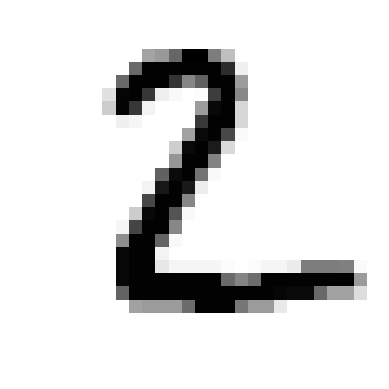

Epoch 1/2


ValueError: ignored

In [15]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import numpy as np
from matplotlib import pyplot as plt


batch_size = 128
epochs = 2

# We know we have 10 classes which are digits from 0-9
num_classes = 10

# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# We now have to transform the data to make it suitable for our network and scale the image

#input image dimensions
img_rows, img_cols = X_train[0].shape

#Reshaping the data to use it in our network
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows,img_cols,1)

#scaling the data
X_train = X_train / 255.0
X_test = X_test/255.0

#Let's check one of the data points
plt.imshow(X_test[1][...,0],cmap='Greys')
plt.axis('off')
plt.show()

#Now, lets see how to create a simple model for our image recognition problem
#We will still use a sequential model and will add a couple of convolutional layers
#with  a ReLU activation function. We will also use a dropout layer that will randomly
#delete 25% of connections and a final dropout of 30%

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape=input_shape))
model.add(Conv2D(32, (3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes,activation='softmax'))

#we will use categorical cross entropy, as we are dealing with a multiclass problem
loss = 'categorical_crossentropy'
optimizer = 'adam'

model.compile(loss=loss, optimizer = optimizer, metrics = ['accuracy'])

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} - Test accuracy: {score[1]}')



Epoch 1/2


ValueError: ignored